In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from glob import glob
import os

In [53]:
filenames = sorted(glob("/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/perturbed/*.csv"))

In [54]:
perturbations = [0, 10, 20, 30, 50, 70]

In [55]:
# calc nb_test accuracies
headers = ['pertubations', 'accuracy_train_score', 'accuracy_test_score','precision_weighted_train_score', 'precision_weighted_test_score','top_5_train_score', 'top_5_test_score']
nb_accuracies = {item: [] for item in headers}
rf_accuracies = {item: [] for item in headers}
for idx, file in enumerate(filenames):
    df = pd.read_csv(file, usecols=['model','accuracy_train_score', 'accuracy_test_score','precision_weighted_train_score', 'precision_weighted_test_score','top_5_train_score', 'top_5_test_score'])
    nb_scores = df[df['model'] == 'naive_bayes'].mean()
    rf_scores = df[df['model'] == 'random_forest'].mean()
    
    for jdx, item in enumerate(headers):
        if jdx == 0:
            nb_accuracies[item].append(perturbations[idx])
            rf_accuracies[item].append(perturbations[idx])
        elif jdx == 1:
            nb_accuracies[item].append(nb_scores['accuracy_train_score'])
            rf_accuracies[item].append(rf_scores['accuracy_train_score'])
        elif jdx == 2:
            nb_accuracies[item].append(nb_scores['accuracy_test_score'])
            rf_accuracies[item].append(rf_scores['accuracy_test_score'])
        elif jdx == 3:
            nb_accuracies[item].append(nb_scores['precision_weighted_train_score'])
            rf_accuracies[item].append(rf_scores['precision_weighted_train_score'])
        elif jdx == 4:
            nb_accuracies[item].append(nb_scores['precision_weighted_test_score'])
            rf_accuracies[item].append(rf_scores['precision_weighted_test_score'])
        elif jdx==5:
            nb_accuracies[item].append(nb_scores['top_5_train_score'])
            rf_accuracies[item].append(rf_scores['top_5_train_score'])
        elif jdx==6:
            nb_accuracies[item].append(nb_scores['top_5_test_score'])
            rf_accuracies[item].append(rf_scores['top_5_test_score'])
            

In [56]:
nb = pd.DataFrame(nb_accuracies)
rf = pd.DataFrame(rf_accuracies)

In [57]:
op_dir = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/perturbed/tables"

In [58]:
nb.to_csv(os.path.join(op_dir, "nb.csv"), index=False)

In [59]:
rf.to_csv(os.path.join(op_dir, "rf.csv"), index=False)

In [60]:
fig_dir = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/perturbed/figures"

In [61]:
import matplotlib.pyplot as plt

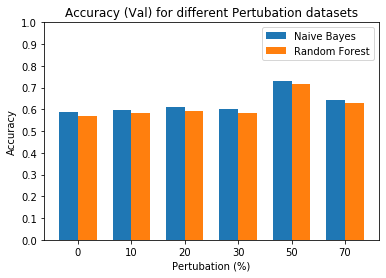

In [62]:
labels = ['0', '10', '20', '30', '50', '70']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nb.accuracy_test_score, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, rf.accuracy_test_score, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Pertubation (%)')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xticklabels(labels)
ax.set_title('Accuracy (Val) for different Pertubation datasets')
ax.legend()
fig.savefig(os.path.join(fig_dir, "perturbed_acc.png"))

acc_fig, acc_ax = plt.subplots()
acc_ax.grid()
acc_ax.plot(nb.pertubations, nb.accuracy_test_score,'o-', color="g", label="Naive Bayes")
acc_ax.plot(rf.pertubations, rf.accuracy_test_score,'o-', color="r", label="Random Forest")
acc_ax.legend(loc='best')
acc_ax.set_ylabel('Accuracy')
acc_ax.set_xlabel('Pertubation (%)')
acc_ax.set_title('Accuracy (Val) for different Pertubation datasets')
acc_fig.savefig(os.path.join(fig_dir, "perturbed_acc.png"))

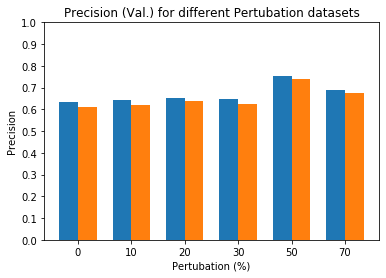

In [73]:
labels = ['0', '10', '20', '30', '50', '70']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nb.precision_weighted_test_score, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, rf.precision_weighted_test_score, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision')
ax.set_xlabel('Pertubation (%)')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xticklabels(labels)
ax.set_title('Precision (Val.) for different Pertubation datasets')
#ax.legend()
fig.savefig(os.path.join(fig_dir, "perturbed_precision.png"))

acc_fig, acc_ax = plt.subplots()
acc_ax.grid()
acc_ax.plot(nb.pertubations, nb.precision_weighted_test_score,'o-', color="g", label="Naive Bayes")
acc_ax.plot(rf.pertubations, rf.precision_weighted_test_score,'o-', color="r", label="Random Forest")
acc_ax.legend(loc='best')
acc_ax.set_ylabel('Precision')
acc_ax.set_xlabel('Pertubation (%)')
acc_ax.set_title('Precision (Val.) for different Pertubation datasets')
acc_fig.savefig(os.path.join(fig_dir, "perturbed_precision.png"))

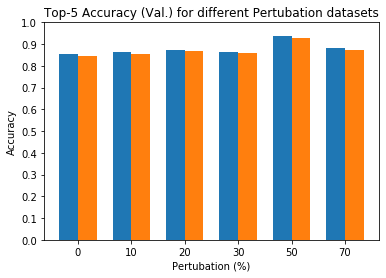

In [72]:
labels = ['0', '10', '20', '30', '50', '70']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nb.top_5_test_score, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, rf.top_5_test_score, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Pertubation (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_title('Top-5 Accuracy (Val.) for different Pertubation datasets')
fig.savefig(os.path.join(fig_dir, "perturbed_top5.png"))

acc_fig, acc_ax = plt.subplots()
acc_ax.grid()
acc_ax.plot(nb.pertubations, nb.top_5_test_score,'o-', color="g", label="Naive Bayes")
acc_ax.plot(rf.pertubations, rf.top_5_test_score,'o-', color="r", label="Random Forest")
acc_ax.legend(loc='best')
acc_ax.set_ylabel('Accuracy')
acc_ax.set_xlabel('Pertubation (%)')
acc_ax.set_title('Precision (Val.) for different Pertubation datasets')
acc_fig.savefig(os.path.join(fig_dir, "perturbed_top5.png"))

In [35]:
avg_symptom_cnt = "3.39456 & 3.38471 & 3.36224 & 3.20398 & 4.10429 & 2.74442"
avg_symptom_cnt = [float(item.strip()) for item in avg_symptom_cnt.split("&")]

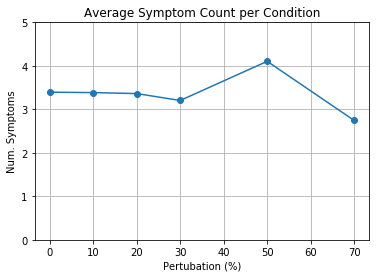

In [47]:
fig, ax = plt.subplots()
ax.grid()
ax.plot(perturbations, avg_symptom_cnt, 'o-')
ax.set_xlabel('Pertubation (%)')
ax.set_ylabel('Num. Symptoms')
ax.set_yticks(np.arange(0, 6, 1.0))
_ = ax.set_title('Average Symptom Count per Condition')
fig.savefig(os.path.join(fig_dir, "avg_symptom_cnt.png"))